In [1]:
import numpy as np
import matplotlib.pyplot as plt

from fenics import *
from numpy.typing import NDArray
from mesh_utils import get_square_f
from matrix_free_rsvd import MatrixFreeRSVD, get_approximate_W, tikhonov_solver

set_log_level(30)  # ignore info logging

/home/elias/miniforge3/envs/fenics_env/lib/python3.9/site-packages/ufl/__init__.py:250: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [ ]:
# Function space
n = 128
mesh = UnitSquareMesh(n, n)
V_h = FunctionSpace(mesh, 'CG', 1)

U_k: (512, 20), S_k: (20,), V_k^T: (20, 16641)


: 

In [ ]:
rsvd = MatrixFreeRSVD(V_h)

f = get_square_f(V_h, 0.65, 0.65)
x = f.vector().get_local()
y = rsvd.apply_K(x)

ks = [5, 10, 50]

sols = [f]
for k in ks:
    # Perform matrix-free rSVD
    Uk, Sk, VkT = rsvd.mf_rsvd(k=k)
    w = get_approximate_W(Vk=VkT.T, M_dx=rsvd.M_dx)

    # Solve y = (K_k)(x)
    x_hat = tikhonov_solver(rsvd, W_diag=w, y=y, lambda_=1e-3)

    f_hat = Function(V_h)
    f_hat.vector()[:] = x_hat
    sols.append(f_hat)


: 

4 4 4


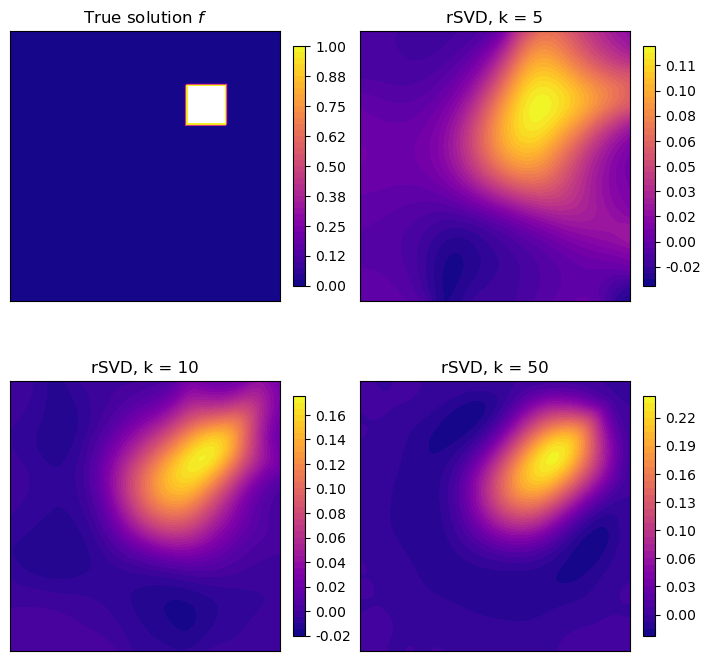

: 

In [ ]:
def plot_many_f(sols, ks):
    fig, axes = plt.subplots(2, 2, figsize=(7, 7), constrained_layout=True)
    axes = axes.flatten()

    names = [
        "True solution $f$",
        f"rSVD, k = {ks[0]}",
        f"rSVD, k = {ks[1]}",
        f"rSVD, k = {ks[2]}"
    ]
    print(len(axes), len(sols), len(names))
    for ax, func, name in zip(axes, sols, names):
        plt.sca(ax)
        p = plot(func, title=name, cmap='plasma')
        fig.colorbar(p, ax=ax, format="%.2f", shrink=0.7)
        ax.set_xticks([])
        ax.set_yticks([])


plot_many_f(sols, ks)